# Gradinet Boosting Regression on MCR & MT Data

28 - 03 - 2023 | MAE = 11.18

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file = r'/content/drive/MyDrive/Colab/xgb-mcr/dataset.csv'

Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)
# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(len(X))
Y = dataset[:, 5] # mcr column
print(len(Y))

179996
179996


Scatter

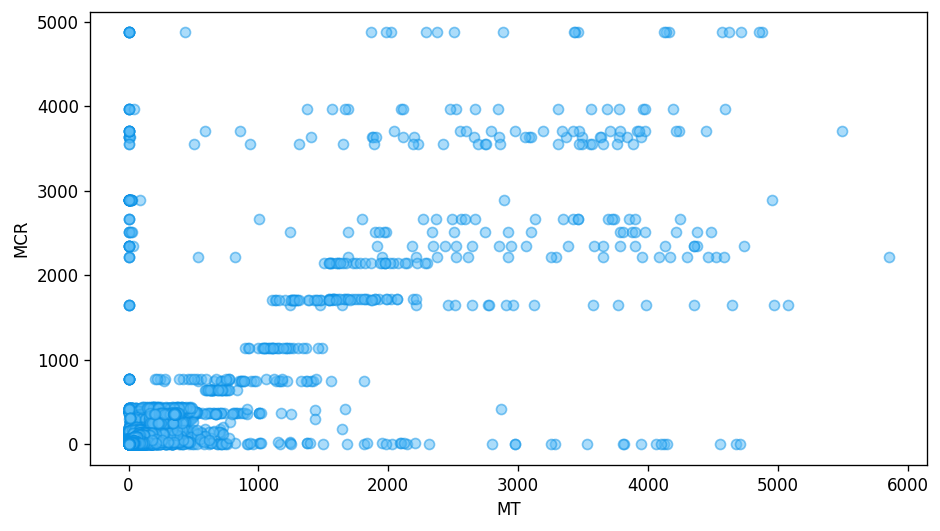

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
plt.ylabel('MCR', fontsize=10)
plt.xlabel('MT', fontsize=10)
plt.show()

Reshape + Split

In [5]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

(134997, 1)
(134997,)
(44999, 1)
(44999,)


Model

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from numpy import mean

# model
gbr = GradientBoostingRegressor(subsample=0.8, learning_rate=0.02, n_estimators=300, max_depth=5, min_samples_split=200, min_samples_leaf=40)

# model evaluation
# The results of this grid search have been used in the gbr model.
'''
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [100, 200, 300],
    'min_samples_leaf': [20, 40, 60]
}

grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)
print(grid.best_params_)
'''

# fit
gbr.fit(X_train, Y_train)

# prediction
Y_pred = gbr.predict(X_test)

# r2 score
print(gbr.score(X_train, Y_train))
print(gbr.score(X_test, Y_test))

0.6133170935494126
0.5739261591526974


Errors

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  14.998910515842711
MAE :  11.183759564137134


Graph

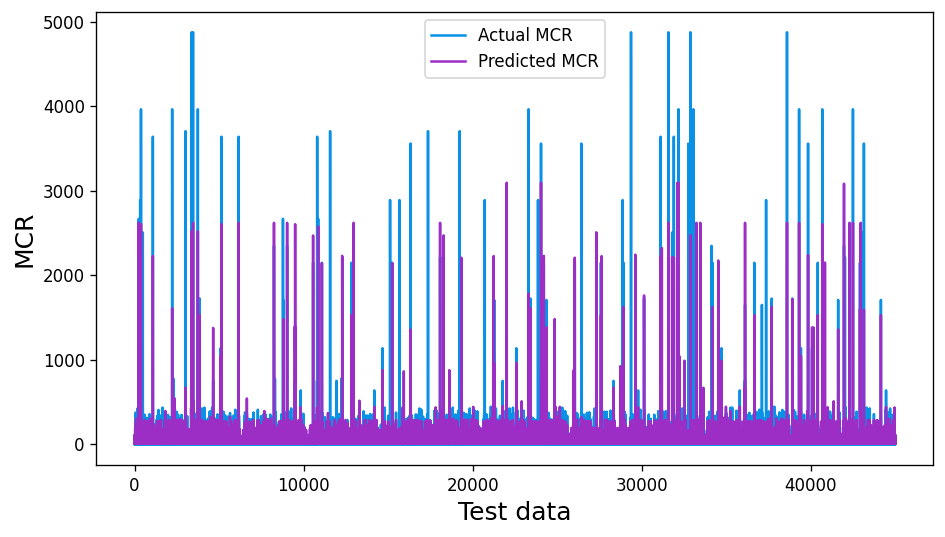

In [8]:
plt.figure(figsize=(9, 5), dpi=120)
plt.plot(Y_test, label='Actual MCR', color="#0991e6")
plt.plot(Y_pred, label='Predicted MCR', color="#9D2EC5")
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data', fontsize=15)
plt.legend()
plt.show()